In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [247]:
df = pd.read_json("C:/Users/madhu/Downloads/ultimate_challenge/logins.json")

In [248]:
df['login_time'] = pd.to_datetime(df['login_time'])
df['login_count'] = 1
df.set_index('login_time', inplace=True)
df.head()

,login_count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   login_count  93142 non-null  int64
dtypes: int64(1)
memory usage: 1.4 MB


In [250]:
df_15 = df.resample('15Min').count()

In [251]:
df_15.head()

,login_count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


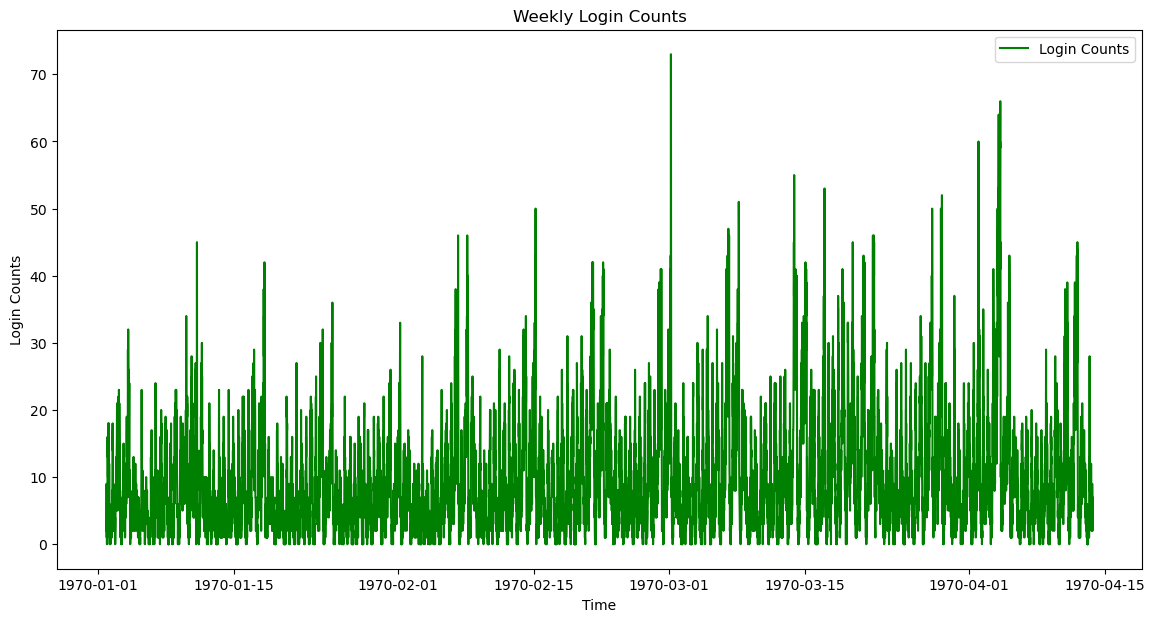

In [252]:
plt.figure(figsize=(14, 7))
plt.plot(df_15, label='Login Counts', color='green')
plt.title('Weekly Login Counts')
plt.xlabel('Time')
plt.ylabel('Login Counts')
plt.legend()
plt.show()

In [253]:
df_15.resample('M').sum()

,login_count
login_time,
1970-01-31,21239
1970-02-28,24673
1970-03-31,33723
1970-04-30,13507


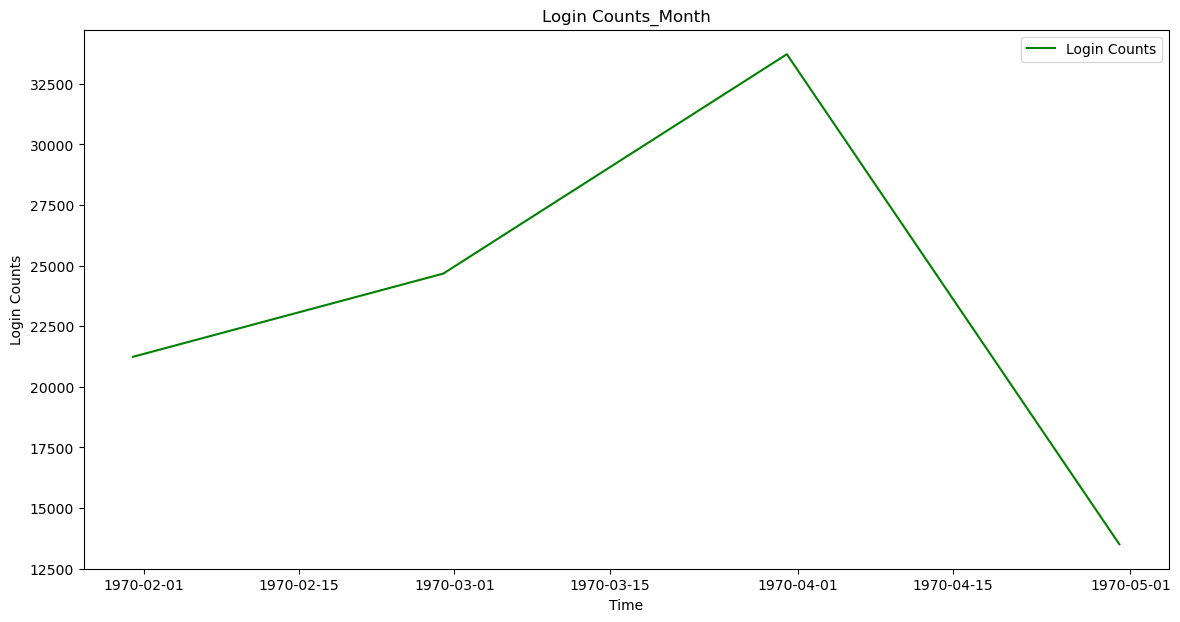

In [254]:
#Which month has the maximum login counts
plt.figure(figsize=(14, 7))
plt.plot(df_15.resample('M').sum(), label='Login Counts', color='green')
plt.title('Login Counts_Month')
plt.xlabel('Time')
plt.ylabel('Login Counts')
plt.legend()
plt.show()

#### Login traffic is mostly seen in the month of April.
#### Traffic is decreasing by the month of May.

In [255]:
df.head()

,login_count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [256]:
df_D = df.resample('D').count()

(array([  0.,  14.,  31.,  45.,  59.,  73.,  90., 104.]),
 [Text(0.0, 0, '1970-01-01'),
  Text(14.0, 0, '1970-01-15'),
  Text(31.0, 0, '1970-02-01'),
  Text(45.0, 0, '1970-02-15'),
  Text(59.0, 0, '1970-03-01'),
  Text(73.0, 0, '1970-03-15'),
  Text(90.0, 0, '1970-04-01'),
  Text(104.0, 0, '1970-04-15')])

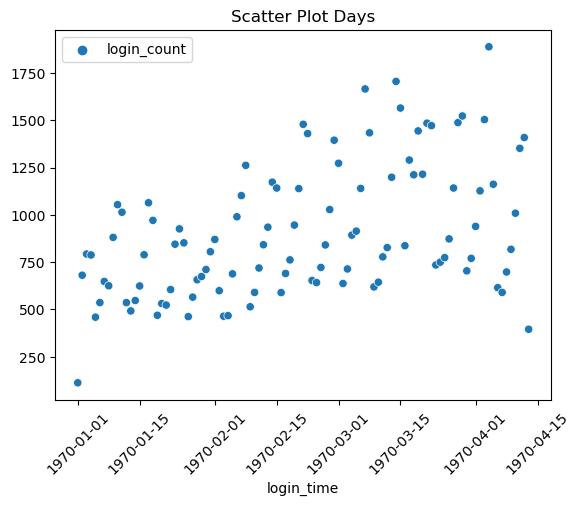

In [257]:
#scatter plot
sns.scatterplot(data = df_D)
plt.title('Scatter Plot Days')
plt.xticks(rotation=45)

#### Trend Over Time: There's a noticeable upward trend in login_count as login_time progresses from early January to mid-April. This indicates an overall increase in logins over time.

#### Variability: The data points are spread out, indicating variability in login counts on different days. This could be due to various factors such as user behavior, promotional events, or other external influences.

#### Outliers: There are some outliers with significantly higher login_count values. These points may indicate days with special events or anomalies.

In [272]:
# Resample the data to hourly frequency and sum the login counts
df_H = df.resample('H').sum()
df_H['day_of_week'] = df_H.index.weekday
df_H['hour'] = df_H.index.hour
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_H['day_of_week'] = df_H['day_of_week'].map(day_map)

# Group by hour and day of the week, then calculate the mean login counts
avg_hourly_logins_df = df_H.groupby(['hour', 'day_of_week'])['login_count'].mean().reset_index()

# Rename columns
avg_hourly_logins_df.rename(columns={'login_count': 'avg_num_logins'}, inplace=True)

# Reorder columns if needed
avg_hourly_logins_df = avg_hourly_logins_df[['hour', 'day_of_week', 'avg_num_logins']]

# Display the result
avg_hourly_logins_df.head()


,hour,day_of_week,avg_num_logins
0,0,Friday,65.000000
1,0,Monday,35.400000
2,0,Saturday,83.600000
3,0,Sunday,74.866667
4,0,Thursday,58.285714


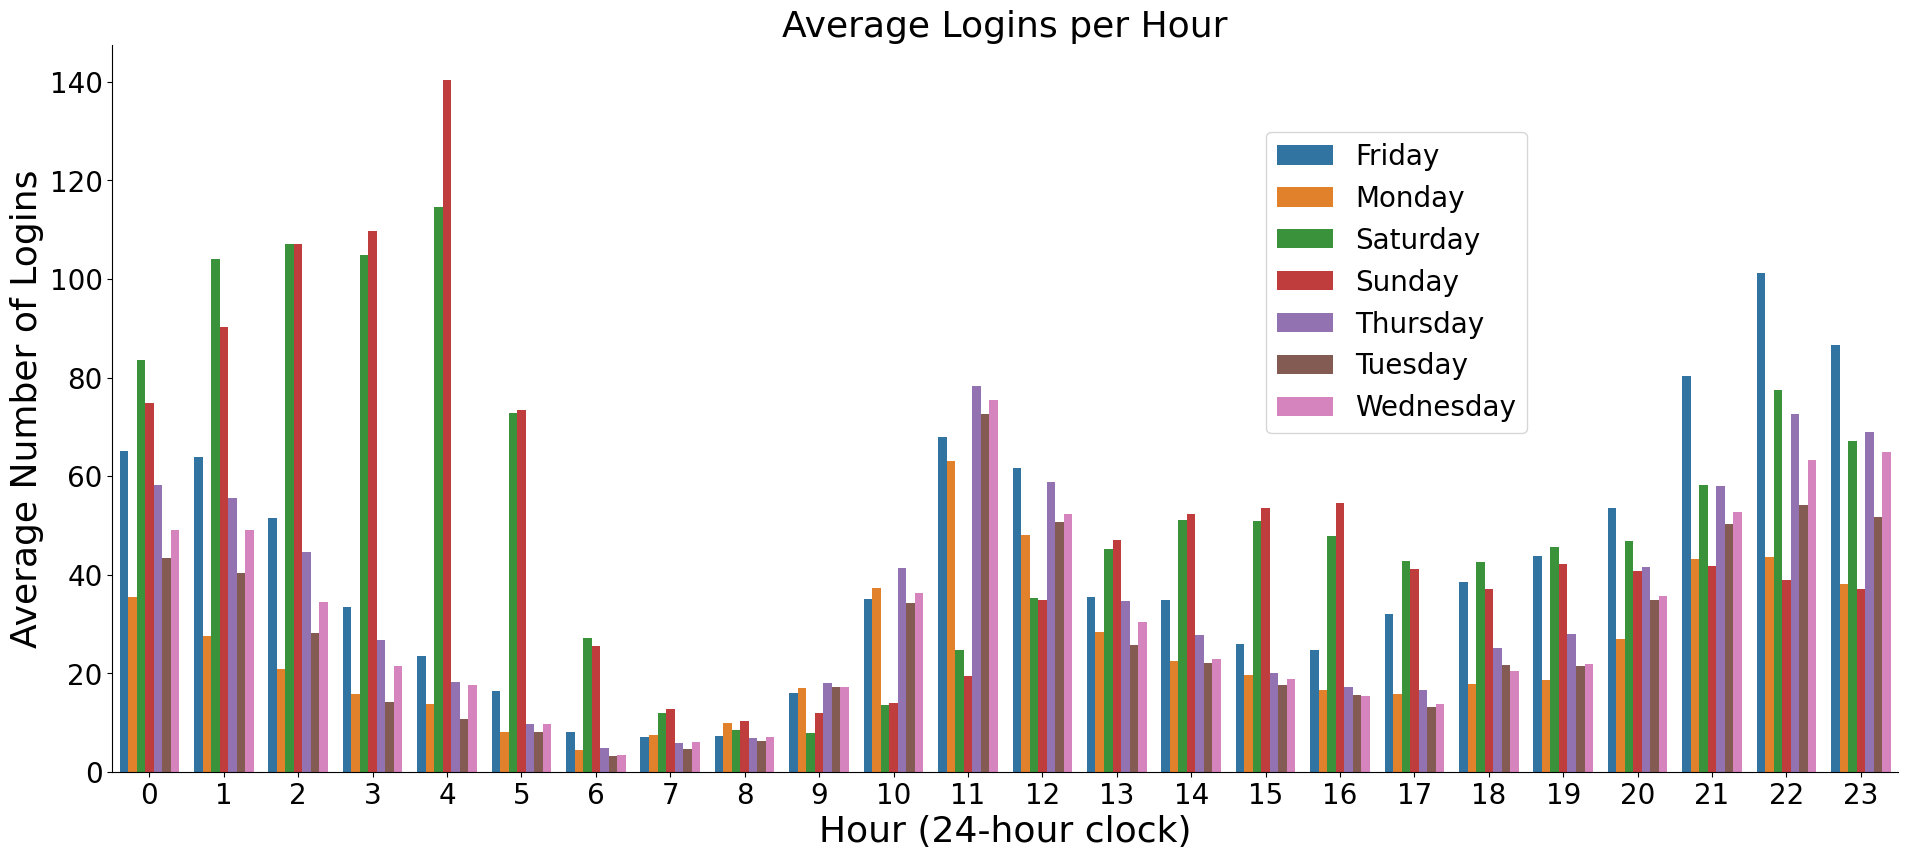

In [286]:
sns.catplot(x='hour', y='avg_num_logins', data=avg_hourly_logins_df, kind = 'bar', 
            hue='day_of_week',height=8, aspect=11.7/5, legend=False)
ax = plt.gca()
ax.set_title('Average Logins per Hour', fontsize = 26)
ax.set_xlabel('Hour (24-hour clock)', fontsize = 26)
ax.set_ylabel('Average Number of Logins', fontsize = 26)
ax.tick_params(labelsize=20,labelcolor="black")
ax.legend(bbox_to_anchor=(0.7,0.7,0.1, 0.2),fontsize=20)

#### Most usage occurs during the early hours (1 AM - 5 AM) on Saturday and Sunday. There are smaller spikes in usage during lunch hours (11 am to noon), and in the evening (9 PM - 11 PM) on the Weekdays.

### Part 2 ‑ Experiment and Metrics Design

Key Measure of Success
Key Measure of Success: The key measure of success for this experiment would be the increase in the number of unique driver partners who serve both Gotham and Metropolis.

Direct Impact: This metric directly measures the behavior we want to change. By reimbursing toll costs, we aim to encourage more driver partners to operate in both cities, thus increasing the number of drivers who serve both cities.
Quantifiable and Objective: It is a quantifiable and objective metric, making it easy to measure and analyze.
Operational Efficiency: More drivers serving both cities can lead to better distribution of drivers, improved service levels, reduced wait times, and potentially increased earnings for drivers.


Experiment Design
Objective: To determine if reimbursing toll costs leads to a significant increase in the number of driver partners who serve both cities.

a) Implementation of the Experiment
Experimental Design:

Pre-Experiment Data Collection:

Collect baseline data on the number of unique driver partners serving both cities without toll reimbursement for a period of 4 weeks.
Collect additional data on other relevant metrics such as total trips, driver earnings, and customer satisfaction.

Collect data on the number of unique driver partners serving both cities for both the control and treatment groups.

Continue to collect data on total trips, driver earnings, and customer satisfaction.
b) Statistical Tests
Statistical Analysis:

Hypothesis Testing:

Null Hypothesis (H0): The toll reimbursement does not lead to a significant increase in the number of unique driver partners serving both cities.
Alternative Hypothesis (H1): The toll reimbursement leads to a significant increase in the number of unique driver partners serving both cities.
Test Selection:

Use a two-sample t-test to compare the mean number of unique driver partners serving both cities between the control and treatment groups.
Significance Level:

Set the significance level (α) at 0.05.
c) Interpretation of Results
Result Interpretation:

Positive Outcome (Reject H0):

If the p-value from the t-test is less than 0.05, we reject the null hypothesis.
This indicates that toll reimbursement has a significant positive effect on the number of unique driver partners serving both cities.
Recommendation: Implement toll reimbursement as a permanent policy to encourage driver partners to serve both cities. Monitor other metrics such as driver earnings and customer satisfaction to ensure overall benefits.

Negative Outcome (Fail to Reject H0):

If the p-value is greater than 0.05, we fail to reject the null hypothesis.
This indicates that toll reimbursement does not have a significant effect on driver behavior.
Recommendation: Do not implement toll reimbursement. Explore alternative incentives or strategies to encourage drivers to serve both cities.

### Part 3 ‐ Predictive modeling

In [295]:
data = pd.read_json("C:/Users/madhu/Downloads/ultimate_challenge/ultimate_data_challenge.json")

In [296]:
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [298]:
# Date columns to datetime format
data['signup_date'] = pd.to_datetime(data['signup_date'])
data['last_trip_date'] = pd.to_datetime(data['last_trip_date'])
end_date = data['last_trip_date'].max()
data['retained'] = data['last_trip_date'] >= (end_date - pd.Timedelta(days=30))

data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False


In [299]:
# Fraction of retained users
retained_fraction = data['retained'].mean()
retained_fraction

0.37608

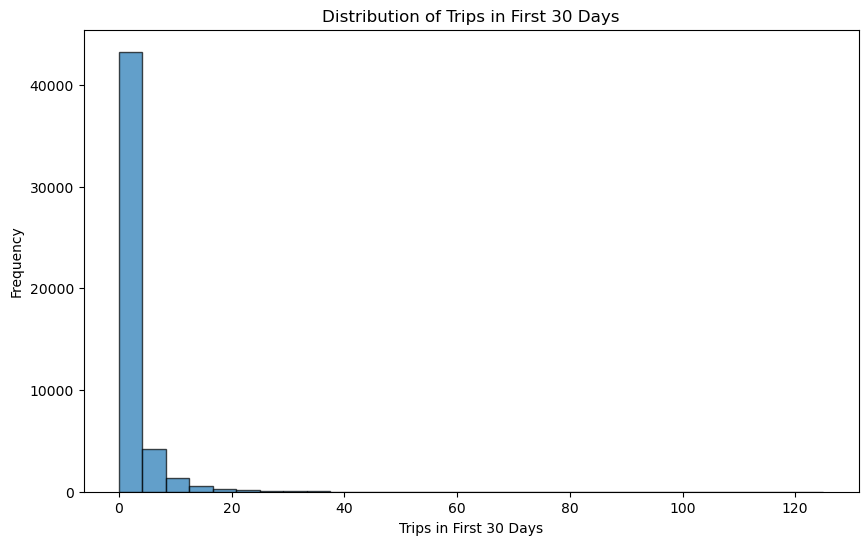

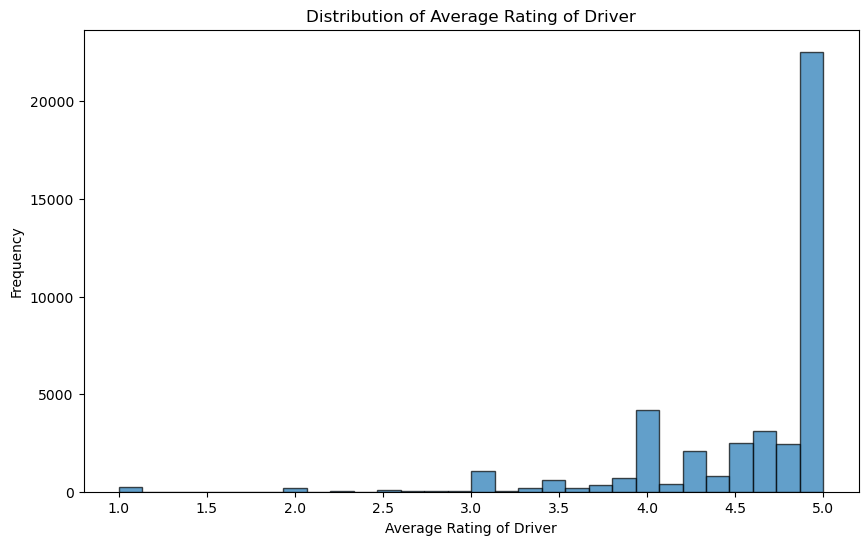

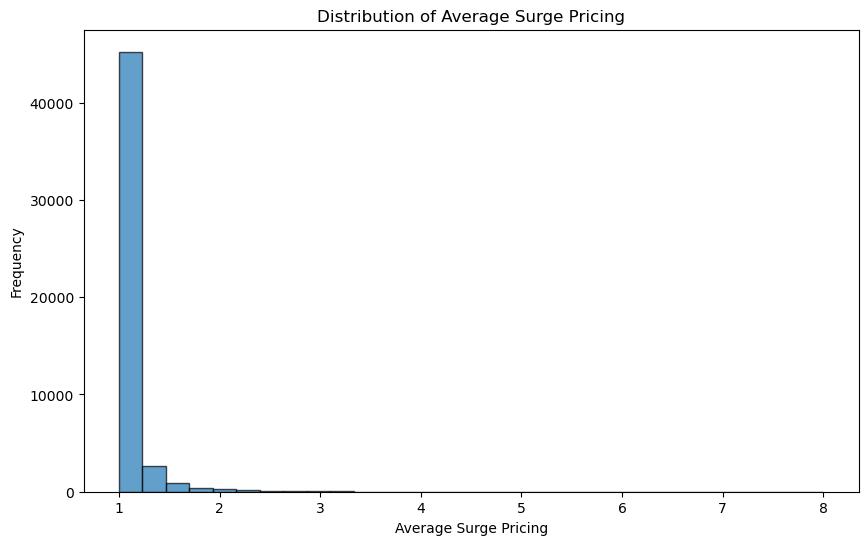

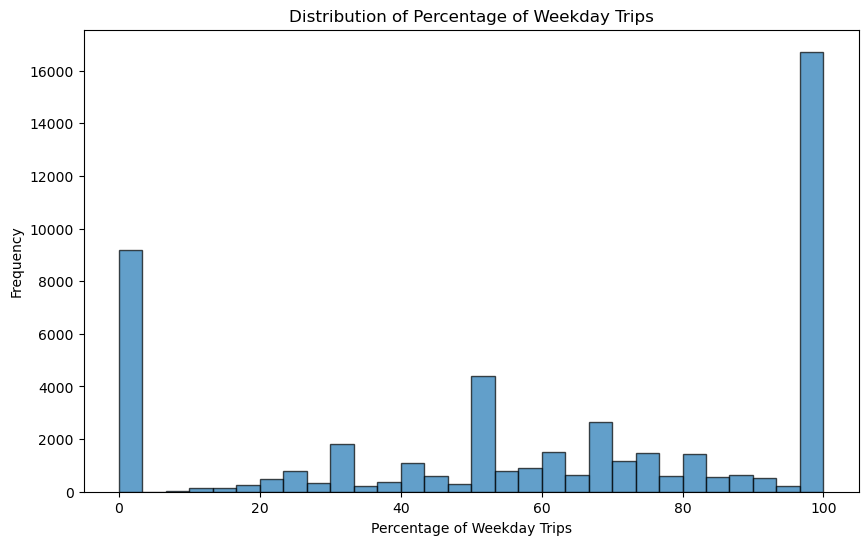

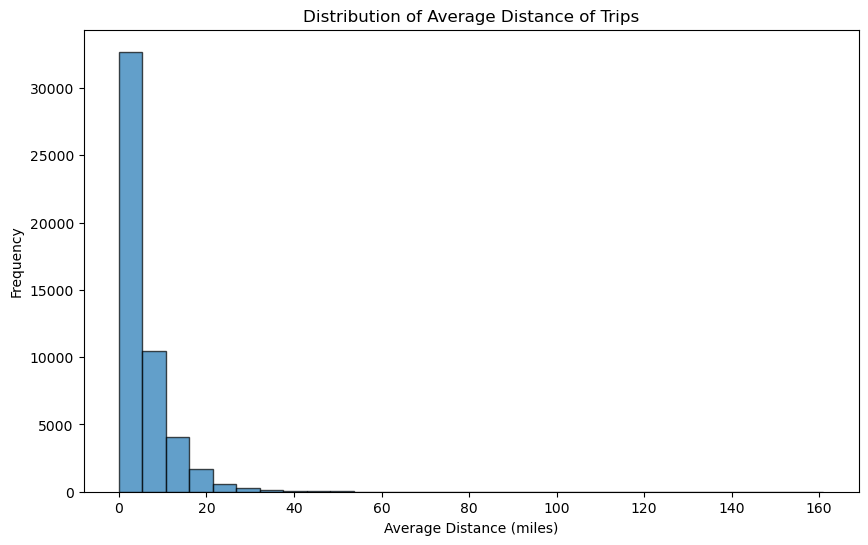

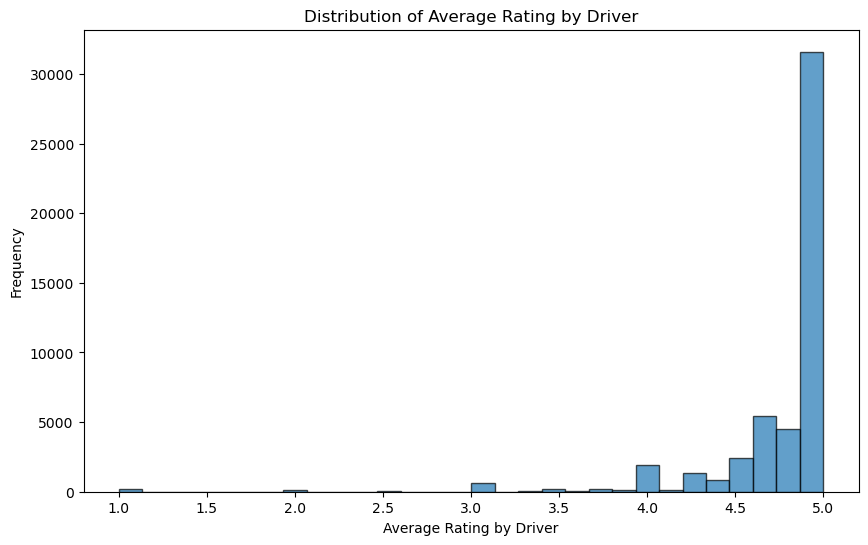

In [300]:
def plot_histogram(column, title, xlabel):
    plt.figure(figsize=(10, 6))
    data[column].hist(bins=30, edgecolor='k', alpha=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

# Distribution of trips in the first 30 days
plot_histogram('trips_in_first_30_days', 'Distribution of Trips in First 30 Days', 'Trips in First 30 Days')

# Average rating of the driver
plot_histogram('avg_rating_of_driver', 'Distribution of Average Rating of Driver', 'Average Rating of Driver')

# Average surge pricing
plot_histogram('avg_surge', 'Distribution of Average Surge Pricing', 'Average Surge Pricing')

# Percentage of trips taken on weekdays
plot_histogram('weekday_pct', 'Distribution of Percentage of Weekday Trips', 'Percentage of Weekday Trips')

# Average distance of trips
plot_histogram('avg_dist', 'Distribution of Average Distance of Trips', 'Average Distance (miles)')

# Average rating by the driver
plot_histogram('avg_rating_by_driver', 'Distribution of Average Rating by Driver', 'Average Rating by Driver')


In [302]:
# Feature engineering
# Categorical variables to dummy variables
data = pd.get_dummies(data, columns=['city', 'phone'], drop_first=True)

# Handling missing values by filling them with the median of the column
data['avg_rating_of_driver'].fillna(data['avg_rating_of_driver'].median(), inplace=True)
data['avg_rating_by_driver'].fillna(data['avg_rating_by_driver'].median(), inplace=True)

features = data.drop(columns=['signup_date', 'last_trip_date', 'retained'])
target = data['retained']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

# Evaluation metrics
accuracy, precision, recall, roc_auc, conf_matrix


(0.7173,
 0.6667832167832168,
 0.5043639248875958,
 0.7604301200657191,
 array([[5266,  953],
        [1874, 1907]], dtype=int64))

In [304]:
#Randon Forest CLassifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_scaled, y_train)

rf_y_pred = rf_model.predict(X_test_scaled)
rf_y_pred_prob = rf_model.predict_proba(X_test_scaled)[:, 1]

rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
rf_roc_auc = roc_auc_score(y_test, rf_y_pred_prob)
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)

rf_accuracy, rf_precision, rf_recall, rf_roc_auc, rf_conf_matrix

(0.7505,
 0.6752998909487459,
 0.6551176937318169,
 0.8160363262134591,
 array([[5028, 1191],
        [1304, 2477]], dtype=int64))

Comparison with Logistic Regression
Accuracy: The Random Forest model has a higher accuracy (75.05%) compared to the logistic regression model (71.73%).

Precision: Both models have similar precision (Random Forest: 67.53%, Logistic Regression: 66.68%).

Recall: The Random Forest model has a significantly higher recall (65.51%) compared to the logistic regression model (50.44%).

ROC-AUC Score: The Random Forest model also has a higher ROC-AUC score (81.60%) compared to the logistic regression model (76.04%).